In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

performan_tests_results='performance_tests/results/17_points_10_times'

In [2]:
def get_until_size(df, limit):
    return df[df['size'] < limit]

def to_minutes(df):
    df['avg_time_minutes'] = df['avg_time'] / 60
    return df

In [3]:
simple_increment_df = get_until_size(pd.read_csv(f'{performan_tests_results}/simple_increment.csv'), 1200)
increment_splitting_transitions_df = get_until_size(pd.read_csv(f'{performan_tests_results}/increment_splitting_transitions.csv'), 1200)
increment_splitting_transitions_in_new_states_df = get_until_size(pd.read_csv(f'{performan_tests_results}/increment_splitting_transitions_in_new_states.csv'), 1200)

In [209]:
import numpy as np
from scipy.optimize import curve_fit

x = 'size'
y = 'avg_time_minutes'
df1 = to_minutes(simple_increment_df)
df2 = to_minutes(increment_splitting_transitions_df)
df3 = to_minutes(increment_splitting_transitions_in_new_states_df)

x1 = df1[x]
y1 = df1[y]

x2 = df2[x]
y2 = df2[y]

x3 = df3[x]
y3 = df3[y]

In [152]:
# Combina todos los puntos en una sola serie
x_combined = np.concatenate([x1, x2, x3])
y_combined = np.concatenate([y1, y2, y3])

x_fit = np.linspace(min(x_combined), max(x_combined), 100)


# Definir la función del polinomio que deseas ajustar
def polinomio(x, a, b, c):
    return a * x**2 + b * x + c
# Definir la función exponencial que deseas ajustar
def exponencial(x, a, b, c):
    return a * np.exp(b * x) + c
# Definir la función de aproximación usando la función gamma
def factorial(x, a, b, c):
    return a * gamma(x + b) + c

# Ajuste de polinomio
polinomio_params, _ = curve_fit(polinomio, x_combined, y_combined)
y_polinomial_fit = polinomio(x_fit, *polinomio_params)

# Ajuste exponencial
exponencial_params, _ = curve_fit(exponencial, x_combined, y_combined)
y_exponencial_fit = polinomio(x_fit, *exponencial_params)

# Ajuste factorial
factorial_params, _ = curve_fit(factorial, x_combined, y_combined)
y_factorial_fit = polinomio(x_fit, *factorial_params)

/home/diego.senarruzza/.pyenv/versions/3.6.5/envs/bisimulation/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/home/diego.senarruzza/.pyenv/versions/3.6.5/envs/bisimulation/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/home/diego.senarruzza/.pyenv/versions/3.6.5/envs/bisimulation/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


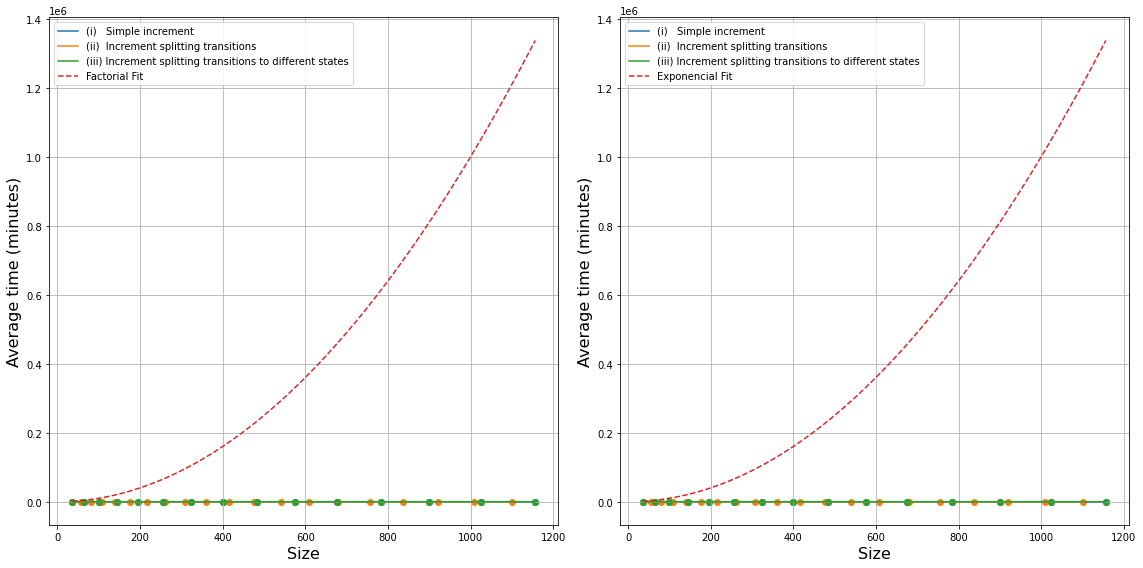

In [217]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(16, 8))

for ax in [ax1, ax2]:
    sns.lineplot(data=df1, x=x, y=y, label='(i)   Simple increment', ax=ax)
    sns.lineplot(data=df2, x=x, y=y, label='(ii)  Increment splitting transitions', ax=ax)
    sns.lineplot(data=df3, x=x, y=y, label='(iii) Increment splitting transitions to different states', ax=ax)

    # Graficar los datos y la curva ajustada
    ax.scatter(x1, y1)
    ax.scatter(x2, y2)
    ax.scatter(x3, y3)
    ax.legend(fontsize=12)
    ax.set_xlabel('Size', fontsize=16)
    ax.set_ylabel('Average time (minutes)', fontsize=16)
    ax.grid(True)

sns.lineplot(x=x_fit, y=y_factorial_fit, label='Factorial Fit', linestyle='--', ax=ax1)
sns.lineplot(x=x_fit, y=y_exponencial_fit, label='Exponencial Fit', linestyle='--', ax=ax2)

# Ajustar el espacio entre los subplots para evitar superposiciones
plt.tight_layout()
plt.savefig(f'{performan_tests_results}/bisimulation_performance_graph_factorial_exponencial_fit.png')

# Mostrar el gráfico
plt.show()

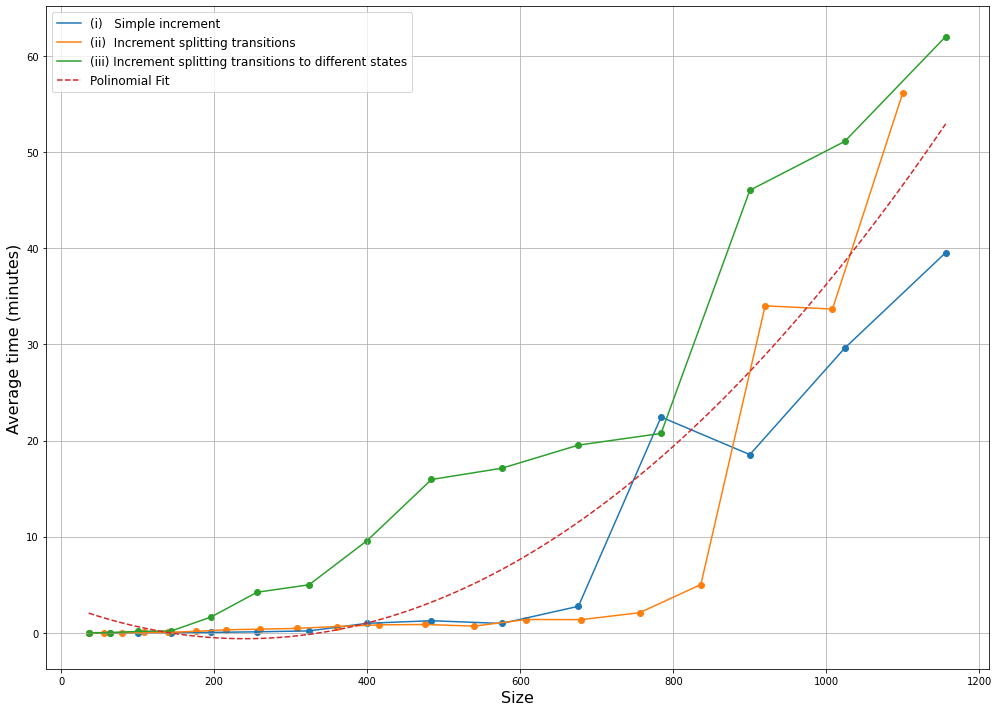

In [218]:
# Crear la figura y la cuadrícula de subplots
fig, ax = plt.subplots(figsize=(14, 10))

sns.lineplot(data=df1, x=x, y=y, label='(i)   Simple increment', ax=ax)
sns.lineplot(data=df2, x=x, y=y, label='(ii)  Increment splitting transitions', ax=ax)
sns.lineplot(data=df3, x=x, y=y, label='(iii) Increment splitting transitions to different states', ax=ax)
sns.lineplot(x=x_fit, y=y_polinomial_fit, label='Polinomial Fit', linestyle='--', ax=ax)

# Graficar los datos y la curva ajustada
ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3)
ax.legend(fontsize=12)
ax.set_xlabel('Size', fontsize=16)
ax.set_ylabel('Average time (minutes)', fontsize=16)
ax.grid(True)

# Ajustar el espacio entre los subplots para evitar superposiciones
plt.tight_layout()

plt.savefig(f'{performan_tests_results}/bisimulation_performance_graph_polinomial_fit.png')

# Mostrar el gráfico
plt.show()